<h1> Problem

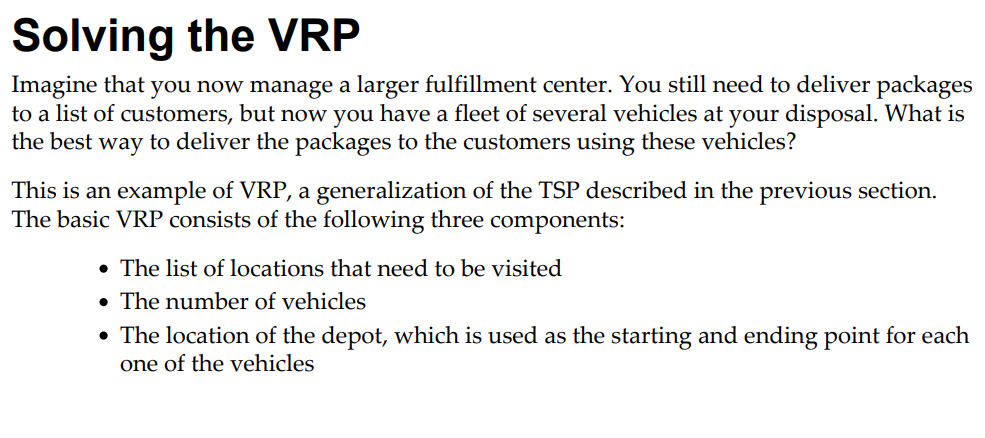

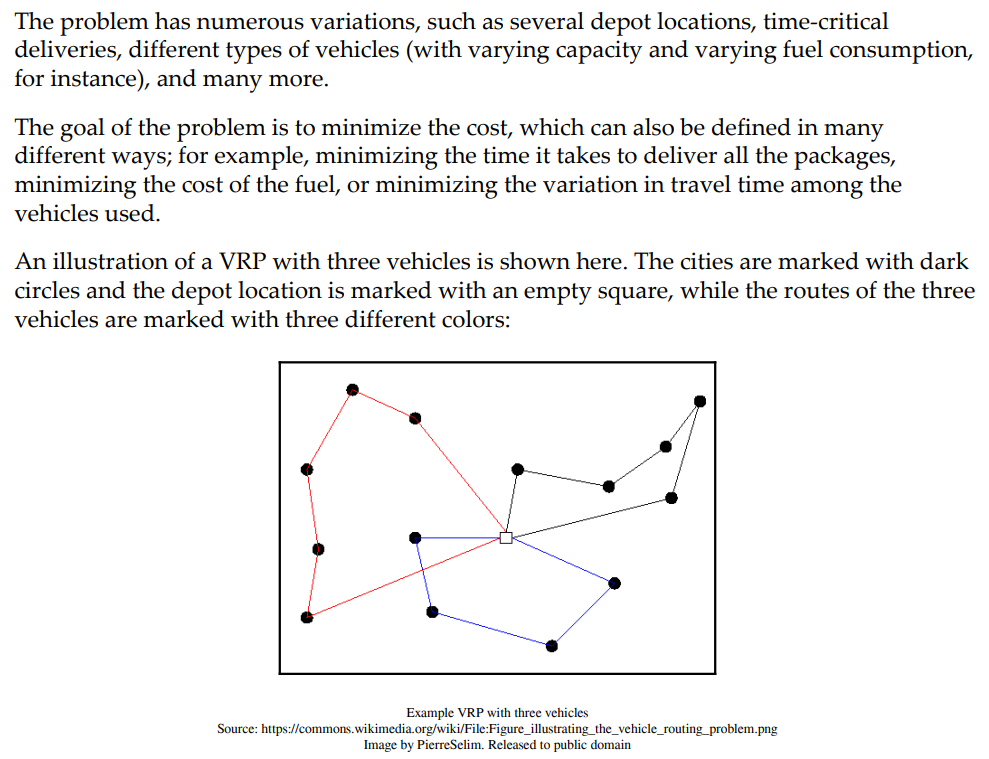

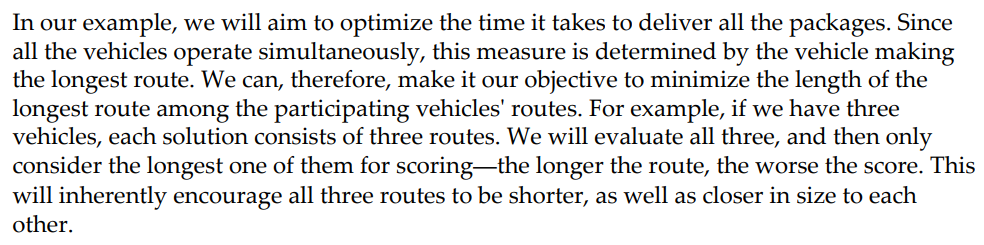

In [1]:
!pip install deap
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1>Taking data

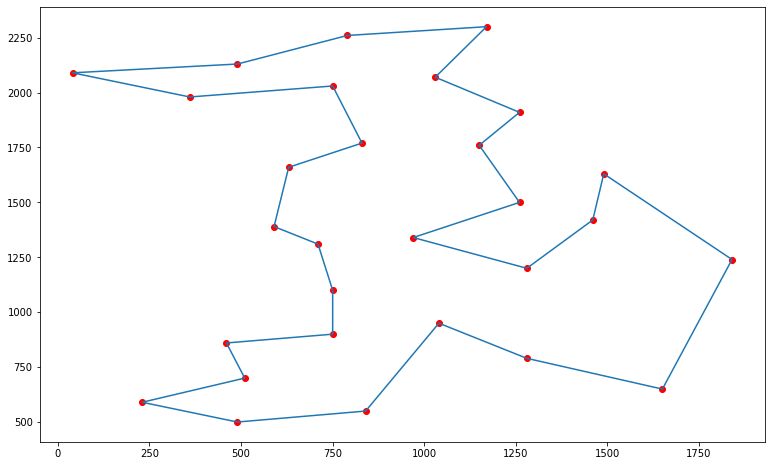

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,529.528092,1158.015544,771.751255,482.597140,332.415403,1217.415295,364.005494,616.116872,629.364759,...,671.192968,320.156212,1422.392351,864.002315,282.311884,978.672570,756.637298,460.108683,186.010752,820.060973
1,529.528092,0.000000,730.068490,572.712843,388.973007,572.800140,1435.444182,860.523097,620.966988,359.026461,...,272.946881,228.254244,1168.417734,1280.820050,650.000000,1086.001842,490.407993,864.002315,677.790528,418.688428
2,1158.015544,730.068490,0.000000,1218.277472,712.530701,990.202000,2160.023148,1521.216618,769.025357,1028.250942,...,890.224691,852.349693,1652.452722,1990.602924,1355.175265,1796.552254,451.774280,1570.127383,1233.207201,338.378486
3,771.751255,572.712843,1218.277472,0.000000,930.000000,1009.603883,1006.230590,910.219754,1160.689450,213.775583,...,331.209903,674.759216,653.911309,1098.954048,648.151217,614.003257,1062.308806,778.781099,957.183368,962.548700
4,482.597140,388.973007,712.530701,930.000000,0.000000,282.842712,1647.543626,841.189634,233.452351,721.110255,...,659.696900,272.029410,1551.934277,1346.179780,735.527022,1348.517705,278.567766,936.055554,523.927476,393.192065
5,332.415403,572.800140,990.202000,1009.603883,282.842712,0.000000,1549.451516,636.553219,306.104557,824.621125,...,809.938269,360.555128,1660.271062,1159.741350,614.654374,1304.185570,543.323108,779.358711,280.178515,676.017751
6,1217.415295,1435.444182,2160.023148,1006.230590,1647.543626,1549.451516,0.000000,992.975327,1825.294497,1148.564321,...,1292.749009,1388.092216,1169.658070,619.838689,935.200513,395.600809,1880.425484,793.095202,1318.976876,1852.835665
7,364.005494,860.523097,1521.216618,910.219754,841.189634,636.553219,992.975327,0.000000,941.753683,843.089556,...,931.450482,674.685112,1508.940025,524.022900,264.196896,865.852181,1118.033989,212.132034,362.353419,1182.962383
8,616.116872,620.966988,769.025357,1160.689450,233.452351,306.104557,1825.294497,941.753683,0.000000,953.362470,...,892.692556,491.629942,1785.385113,1463.864748,893.588272,1549.516053,326.955654,1074.476617,586.003413,513.127664
9,629.364759,359.026461,1028.250942,213.775583,721.110255,824.621125,1148.564321,843.089556,953.362470,0.000000,...,144.222051,475.394573,839.344983,1132.166066,581.893461,771.556868,848.999411,758.023746,813.941030,755.910048


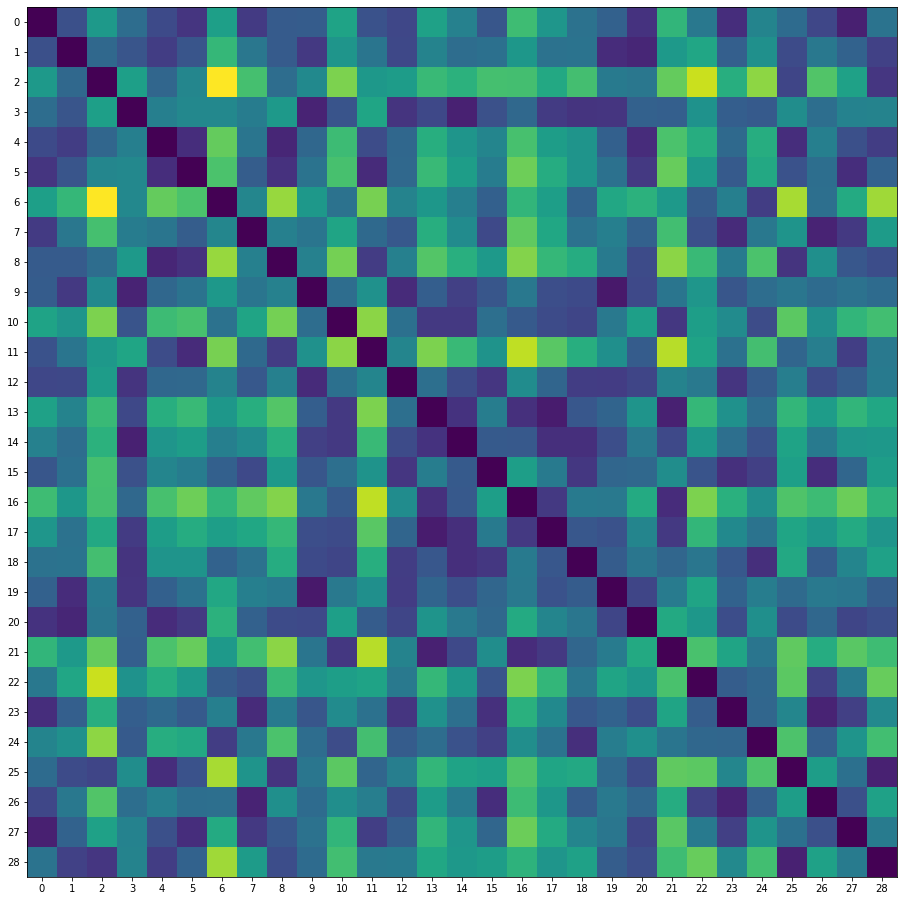

In [2]:
def take_data(NAME="bayg29.tsp"):
  """link for more problems http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/"""
  import pandas as pd
  import requests
  from bs4 import BeautifulSoup
  import re
  from pprint import pprint
  import matplotlib.pyplot as plt

  # Taking data
  PROBLEM_NAME = NAME
  url = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/"
  req = requests.get("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/bayg29.tsp")
  site = BeautifulSoup(req.content, "html.parser").text
  informations = re.findall(r"^\s+\d+\s+\d+.0\s+\d+.0$", site, flags=re.MULTILINE)

  # Taking cities and points
  cities = []
  for i in informations:
    i = list(map(lambda x: int(float(x)), i.strip().split()))
    i[0] -= 1
    cities.append(i)
  #pprint(cities)

  # Plotting
  x = [i[1] for i in cities]
  y = [i[2] for i in cities]
  plt.figure(figsize=(13,8))
  plt.scatter(x, y, marker='o', color="red")
  Optimal_solution =  [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
  Optimal_solution.append(Optimal_solution[0])
  x_new = [cities[i][1] for i in Optimal_solution]
  y_new = [cities[i][2] for i in Optimal_solution]
  plt.plot(x_new, y_new)
  plt.show()

  # Making the matrix of distances
  matrix = [[0 for i in range(len(cities))] for i in range(len(cities))]
  for y in range(len(matrix)):
    for x in range(len(matrix[0])):
      matrix[y][x] = ((cities[y][1]-cities[x][1])**(2) + (cities[y][2]-cities[x][2])**2)**(1/2)


  df_matrix = pd.DataFrame(matrix, columns=[i for i in range(len(cities))])
  display(df_matrix)
  """for i in matrix:
    print(i, "\n")"""

  plt.figure(figsize=(16,16))
  plt.imshow(matrix)
  plt.xticks(ticks=[i for i in range(len(cities))])
  plt.yticks(ticks=[i for i in range(len(cities))])
  plt.show()
  return cities, matrix

cities, matrix = take_data()
#display(cities)

<h1>Plotting data and a random solution

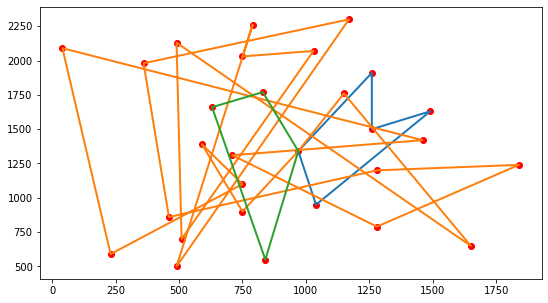

In [14]:
# Random solution
random_solution = [[27, 23, 7, 18], [14, 19, 3, 16, 2, 26, 9, 24, 22, 15, 17, 28, 11, 21, 8, 4, 5, 13, 25, 6, 0], [10, 1, 20]]

def route(solution, origem=12):
  from collections import deque
  routes = []
  for i in solution:
    route = deque(i)
    route.append(origem)
    route.appendleft(origem)
    routes.append(route)
  return routes

random_solution = route(random_solution)    


def plotting_solution(solution):
  import matplotlib.pyplot as plt
  global cities
  
  # Background
  plt.figure(figsize=(9,5))
  x = [x[1] for x in cities]
  y = [y[2] for y in cities]
  plt.scatter(x, y, marker="o", color="red")

  # Routes
  for i in solution:
    x = [cities[x][1] for x in i]
    y = [cities[y][2] for y in i]
    plt.plot(x,y, linewidth=2)
  plt.show()

plotting_solution(random_solution)
  


<h1>Solving the problem

In [37]:
from deap import creator, base, tools, algorithms
import random
import numpy as np


# STRUCTURE
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("chromosomeStruct", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CARS_NUMBER = 3 # WRITE HERE THE NUMBER OF CARS THAT YOU WANT
CHROMOSOME_LENGTH = [i for i in range(len(cities)+CARS_NUMBER - 1)]
def chromosome(c=CHROMOSOME_LENGTH):
  chromosome = random.sample(c, k=len(c))
  return chromosome
toolbox.register("Individual", tools.initIterate, creator.chromosomeStruct, chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS
def make_routes(individual_with_origem, origem=12):
  global cities
  individual = individual_with_origem.copy()
  individual.remove(origem)
  length = len(cities)
  routes = []
  route = [origem]
  for i, city in enumerate(individual, start=0):
    if city >= length:
      route.append(origem)
      routes.append(route)
      route = [origem]
    else:
      route.append(individual[i])
      if i == len(individual)-1:
        route.append(origem)
        routes.append(route)
        route = [origem]
  return routes
def fitness_function(individual):
  global matrix
  fitness = 0
  for route in make_routes(individual):
    value = 0
    for i in range(len(route)-1):
      value += matrix[route[i]][route[i+1]]
    if value > fitness:
      fitness = value
  return fitness,
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=20)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=3/len(CHROMOSOME_LENGTH))

# STORING INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
def comparation(values):
  #best = [0, 20, 17, 16, 13, 21, 10, 14, 3, 29, 15, 23, 7, 26, 12, 22, 6, 24, 18, 9, 19, 30, 27, 11, 5, 4, 8, 25, 2, 28, 1]
  best_score = 3857.3634325252774
  return best_score/min(values)[0]
stats.register("Best_comparation", comparation)
hof = tools.HallOfFame(3)

# CONTROL PANEL
POPULATION_SIZE = 5000
PROBABILITY_CROSSOVER = 1
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 100 # (stopping condition)
random.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=PROBABILITY_CROSSOVER,
                                  mutpb=PROBABILITY_MUTATION,
                                  stats=stats,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'chromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min    	mean   	Best_comparation
0  	5000  	31652.6	8100.98	16867.4	0.47616         
1  	5000  	26837  	7824.29	12877  	0.492999        
2  	5000  	26237.2	7222.33	11881  	0.534089        
3  	5000  	23879.7	6712.33	11451.8	0.574668        
4  	5000  	25473.5	6380.51	11136.4	0.604554        
5  	5000  	25050.5	6517.28	10840.5	0.591867        
6  	5000  	23651.8	6137.38	10409.3	0.628503        
7  	5000  	24231.5	5907.84	9859.08	0.652922        
8  	5000  	24208.1	5741.26	9535.04	0.671867        
9  	5000  	25246.9	5566.09	9128.03	0.693011        
10 	5000  	21578  	5426   	8777.47	0.710903        
11 	5000  	22598.9	5158.84	8479.18	0.747719        
12 	5000  	26002.9	5158.84	8215.39	0.747719        
13 	5000  	21999.7	5056.31	8037.58	0.762882        
14 	5000  	20782  	5056.31	7928.26	0.762882        
15 	5000  	22724.8	4900.42	7773.39	0.78715         
16 	5000  	20421  	4821.84	7549.15	0.799977        
17 	5000  	22782  	4755.79	7371.27	0.811089        
18 	5000  	2

<h1>Plotting results

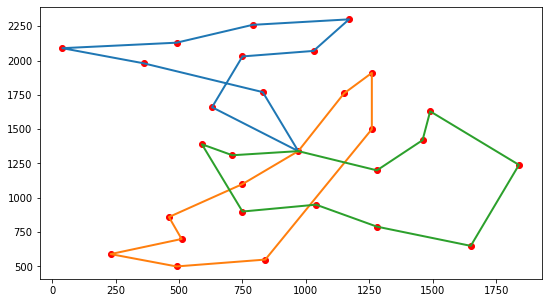

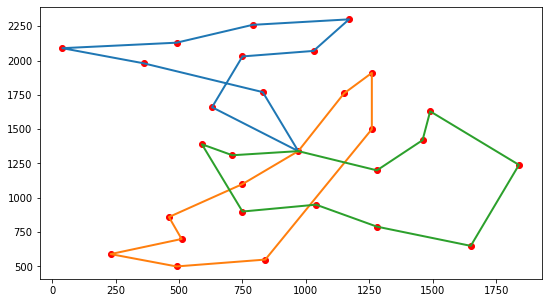

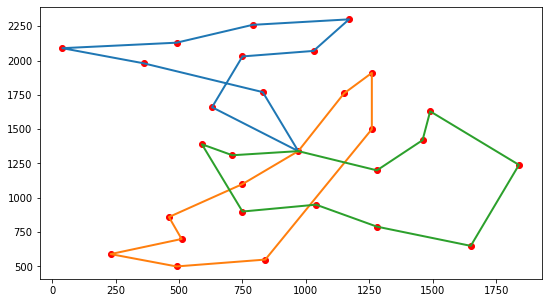

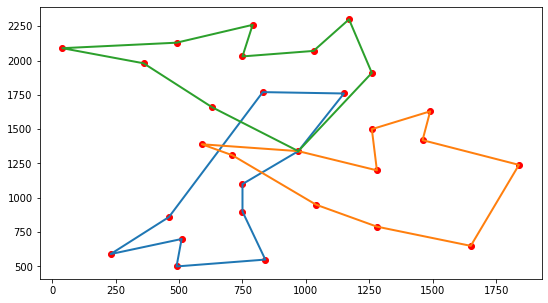

In [38]:
for solution in hof:
  #print(make_routes(solution))
  #print(fitness_function(solution))
  plotting_solution(make_routes(solution))

best = [0, 20, 17, 16, 13, 21, 10, 14, 3, 29, 15, 23, 7, 26, 12, 22, 6, 24, 18, 9, 19, 30, 27, 11, 5, 4, 8, 25, 2, 28, 1]
plotting_solution(make_routes(best))

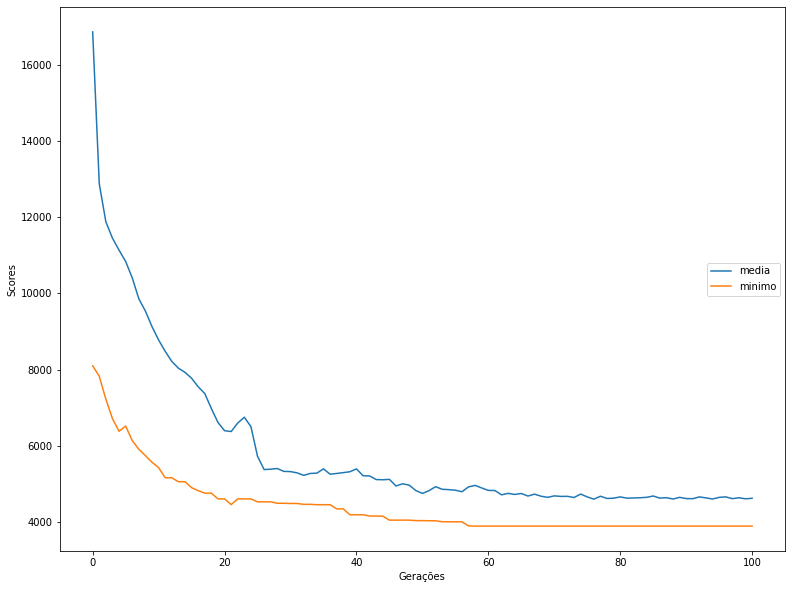

In [39]:
import matplotlib.pyplot as plt

# taking data
y_mean = log.select("mean")
y_min = log.select("min")
#y_max = log.select("max")
#y_std = log.select("std")
x_gen = log.select("gen")


#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
#plt.plot(x_gen, y_max, label="maximo")
#plt.plot(x_gen, y_std, label="std")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)

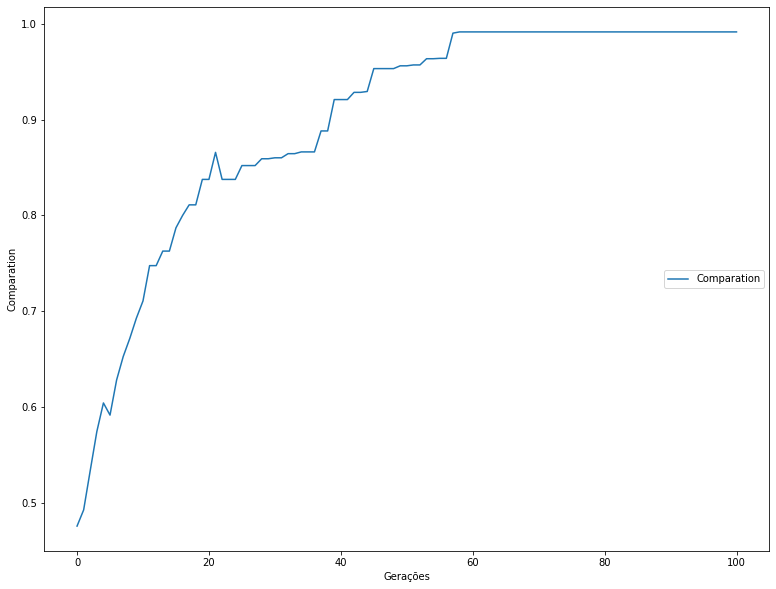

In [40]:
# taking data
y_comparation = log.select("Best_comparation")

#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_comparation, label="Comparation")


plt.xlabel("Gerações")
plt.ylabel("Comparation")
plt.legend(loc=5)